## Analysis of the impact of control (Public/Private, Profit/Non-Profit) on Performance of US colleges [Performance is measured by Graduation/Retention rates]:  Data source: https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources

#### Section 1: Data loading and Cleaning

In [1]:
data <- read.csv("data.csv",stringsAsFactors = FALSE)
head(data)

UNITID,CONTROL,SAT_AVG,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,...,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,PFTFTUG1_EF,RET_FT4,RET_PT4,C200_4_POOLED,PCTFLOAN
100937,2,1230,1205,0.7867,0.1386,0.0266,0.0216,0.0025,0,...,11077,6294,0.6839,0.2357,0.691,0.8535,0.7988,NULL,0.6791,0.4666
101435,2,1076,1007,0.6832,0.1897,0.0497,0.0070,0.0070,0,...,6551,6678,0.464,0.445,0.4942,0.8,0.6169,NULL,0.3879,0.7225
106342,2,1165,650,0.5462,0.0938,0.0631,0.0462,0.0277,0,...,13087,6577,1,0.4137,0.538,0.7489,0.6791,NULL,0.4504,0.6122
107080,2,1324,1104,0.6078,0.0697,0.0661,0.0317,0.0000,0,...,14011,7474,1,0.2978,0.7074,0.966,0.8867,NULL,0.7255,0.4825
111966,2,889,183,0.0437,0.3880,0.3169,0.1093,0.0000,0,...,27401,8456,0.2727,0.5276,0.75,0.1774,0.7037,NULL,0.5,0.681
137962,2,939,211,0.4502,0.2275,0.1848,0.0237,0.0095,0,...,5250,4222,0.6071,0.5756,0.087,0.4583,0.5484,NULL,0.3571,0.6878


In [2]:
colnames(data)

[1] "UNITID"         "CONTROL"        "SAT_AVG"        "UGDS"          
 [5] "UGDS_WHITE"     "UGDS_BLACK"     "UGDS_HISP"      "UGDS_ASIAN"    
 [9] "UGDS_AIAN"      "UGDS_NHPI"      "UGDS_2MOR"      "UGDS_NRA"      
[13] "UGDS_UNKN"      "TUITIONFEE_IN"  "TUITIONFEE_OUT" "TUITFTE"       
[17] "INEXPFTE"       "AVGFACSAL"      "PFTFAC"         "PCTPELL"       
[21] "C150_4"         "PFTFTUG1_EF"    "RET_FT4"        "RET_PT4"       
[25] "C200_4_POOLED"  "PCTFLOAN"

In [3]:
df <- data[c('CONTROL','SAT_AVG','TUITIONFEE_IN','TUITIONFEE_OUT', 'INEXPFTE',
             'AVGFACSAL','PFTFAC','PCTPELL','C150_4','RET_FT4')]

In [4]:
head(df)

CONTROL,SAT_AVG,TUITIONFEE_IN,TUITIONFEE_OUT,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,RET_FT4
2,1230,18238,18238,11077,6294,0.6839,0.2357,0.691,0.7988
2,1076,27400,27400,6551,6678,0.464,0.445,0.4942,0.6169
2,1165,29140,29140,13087,6577,1,0.4137,0.538,0.6791
2,1324,47600,47600,14011,7474,1,0.2978,0.7074,0.8867
2,889,13972,13972,27401,8456,0.2727,0.5276,0.75,0.7037
2,939,16300,16300,5250,4222,0.6071,0.5756,0.087,0.5484


In [5]:
str(df)

'data.frame':	1278 obs. of  10 variables:
 $ CONTROL       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ SAT_AVG       : int  1230 1076 1165 1324 889 939 1245 1079 1206 1167 ...
 $ TUITIONFEE_IN : chr  "18238" "27400" "29140" "47600" ...
 $ TUITIONFEE_OUT: chr  "18238" "27400" "29140" "47600" ...
 $ INEXPFTE      : int  11077 6551 13087 14011 27401 5250 15076 12095 5869 14699 ...
 $ AVGFACSAL     : chr  "6294" "6678" "6577" "7474" ...
 $ PFTFAC        : chr  "0.6839" "0.464" "1" "1" ...
 $ PCTPELL       : chr  "0.2357" "0.445" "0.4137" "0.2978" ...
 $ C150_4        : chr  "0.691" "0.4942" "0.538" "0.7074" ...
 $ RET_FT4       : chr  "0.7988" "0.6169" "0.6791" "0.8867" ...


In [6]:
summary(df)

    CONTROL         SAT_AVG     TUITIONFEE_IN      TUITIONFEE_OUT    
 Min.   :1.000   Min.   : 737   Length:1278        Length:1278       
 1st Qu.:1.000   1st Qu.:1053   Class :character   Class :character  
 Median :2.000   Median :1118   Mode  :character   Mode  :character  
 Mean   :1.619   Mean   :1140                                        
 3rd Qu.:2.000   3rd Qu.:1204                                        
 Max.   :3.000   Max.   :1557                                        
                                                                     
    INEXPFTE       AVGFACSAL            PFTFAC            PCTPELL         
 Min.   :  2130   Length:1278        Length:1278        Length:1278       
 1st Qu.:  7300   Class :character   Class :character   Class :character  
 Median :  9522   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 11799                                                           
 3rd Qu.: 12862                                                  

In [7]:
library("dplyr")

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
# Rename the variables

df <- df%>% rename(
Control = CONTROL,
SatScore = SAT_AVG,
InStateTuition = TUITIONFEE_IN,
OutStateTuition=TUITIONFEE_OUT,
InstructionalCost = INEXPFTE,
FullTimeFaculty = PFTFAC,
CompletionRate = C150_4,
RetentionRate = RET_FT4,
FacultySalary = AVGFACSAL,
PellGrant = PCTPELL)

In [9]:
# Change the data types of FacultySalary, FullTimeFaculty, PellGrant, CompletionRate, 
# RetentionRate,Instatetution,Control, 

df <- df %>% mutate(
Control = as.character(Control),
InStateTuition = as.numeric(InStateTuition),
OutStateTuition = as.numeric(OutStateTuition),
FacultySalary = as.numeric(FacultySalary),
FullTimeFaculty = as.numeric(FullTimeFaculty),
PellGrant = as.numeric(PellGrant),
CompletionRate = as.numeric(CompletionRate),
RetentionRate = as.numeric(RetentionRate))

Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"

In [10]:
str(df)

'data.frame':	1278 obs. of  10 variables:
 $ Control          : chr  "2" "2" "2" "2" ...
 $ SatScore         : int  1230 1076 1165 1324 889 939 1245 1079 1206 1167 ...
 $ InStateTuition   : num  18238 27400 29140 47600 13972 ...
 $ OutStateTuition  : num  18238 27400 29140 47600 13972 ...
 $ InstructionalCost: int  11077 6551 13087 14011 27401 5250 15076 12095 5869 14699 ...
 $ FacultySalary    : num  6294 6678 6577 7474 8456 ...
 $ FullTimeFaculty  : num  0.684 0.464 1 1 0.273 ...
 $ PellGrant        : num  0.236 0.445 0.414 0.298 0.528 ...
 $ CompletionRate   : num  0.691 0.494 0.538 0.707 0.75 ...
 $ RetentionRate    : num  0.799 0.617 0.679 0.887 0.704 ...


In [11]:
summary(df)

   Control             SatScore    InStateTuition  OutStateTuition
 Length:1278        Min.   : 737   Min.   :  480   Min.   :  480  
 Class :character   1st Qu.:1053   1st Qu.:10275   1st Qu.:19241  
 Mode  :character   Median :1118   Median :23164   Median :28389  
                    Mean   :1140   Mean   :24807   Mean   :29460  
                    3rd Qu.:1204   3rd Qu.:35550   3rd Qu.:36886  
                    Max.   :1557   Max.   :61788   Max.   :61788  
                                   NA's   :4       NA's   :4      
 InstructionalCost FacultySalary   FullTimeFaculty    PellGrant     
 Min.   :  2130    Min.   : 1002   Min.   :0.0592   Min.   :0.0000  
 1st Qu.:  7300    1st Qu.: 6624   1st Qu.:0.5208   1st Qu.:0.2516  
 Median :  9522    Median : 7832   Median :0.6964   Median :0.3436  
 Mean   : 11799    Mean   : 8332   Mean   :0.6898   Mean   :0.3509  
 3rd Qu.: 12862    3rd Qu.: 9566   3rd Qu.:0.9113   3rd Qu.:0.4357  
 Max.   :132974    Max.   :20988   Max.   :1.0000 

In [12]:
sum(is.na(df))

[1] 79

In [13]:
mean(is.na(df))

[1] 0.006181534

In [14]:
df <- na.omit(df)

#### Section 2: Data Exploration

In [15]:
summary(df)

   Control             SatScore    InStateTuition  OutStateTuition
 Length:1233        Min.   : 737   Min.   : 1050   Min.   : 1050  
 Class :character   1st Qu.:1055   1st Qu.:10507   1st Qu.:19771  
 Mode  :character   Median :1120   Median :24578   Median :28887  
                    Mean   :1142   Mean   :25183   Mean   :29883  
                    3rd Qu.:1205   3rd Qu.:35740   3rd Qu.:37280  
                    Max.   :1557   Max.   :61788   Max.   :61788  
 InstructionalCost FacultySalary   FullTimeFaculty    PellGrant     
 Min.   :  2130    Min.   : 2884   Min.   :0.0769   Min.   :0.0000  
 1st Qu.:  7349    1st Qu.: 6660   1st Qu.:0.5234   1st Qu.:0.2501  
 Median :  9561    Median : 7862   Median :0.6972   Median :0.3414  
 Mean   : 11842    Mean   : 8383   Mean   :0.6906   Mean   :0.3494  
 3rd Qu.: 12904    3rd Qu.: 9621   3rd Qu.:0.9111   3rd Qu.:0.4344  
 Max.   :132974    Max.   :20988   Max.   :1.0000   Max.   :0.9077  
 CompletionRate   RetentionRate   
 Min.   :0.07

In [16]:
library("ggplot2")
library("GGally")

Warning message:
"package 'ggplot2' was built under R version 4.1.1"Warning message:
"package 'GGally' was built under R version 4.1.1"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


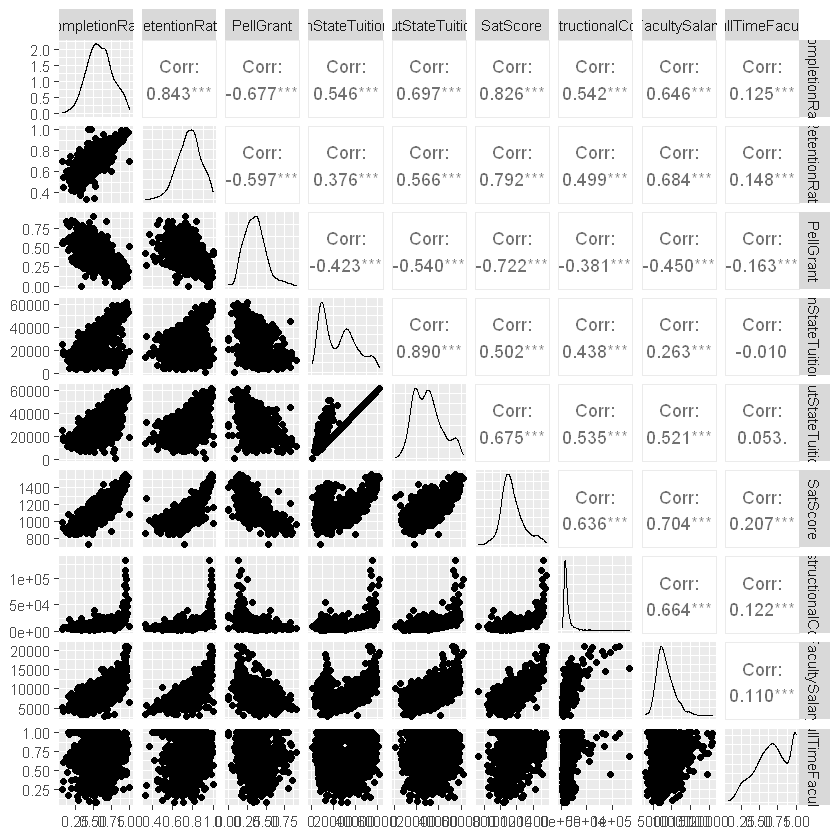

In [17]:
# Check for correlatons among the features:

ggpairs(df[c("CompletionRate","RetentionRate","PellGrant","InStateTuition","OutStateTuition","SatScore",
             "InstructionalCost","FacultySalary","FullTimeFaculty")])

In [18]:
library("plyr")

Warning message:
"package 'plyr' was built under R version 3.6.3"------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



In [19]:
# Recod Control into Public and Profit

df$Public <- revalue(df$Control,c("3"="0","2"="0","1"="1"))

In [20]:
# Profit

df$Profit <- revalue(df$Control,c("1"="0","2"="0","3"="1"))

#### Section 3: Model Building and Analysis

###### Model1:  CompletionRate = b0 + b1SatScore + b2InStateTuition + b2OutStateTuition + b4InstructionalCost + b5FacultySalary + b6FullTimeFaculty + b7PellGrant + b8Public

###### Model2:  RetentionRate = b0 + b1SatScore + b2InStateTuition + b2OutStateTuition + b4InstructionalCost + b5FacultySalary + b6FullTimeFaculty + b7PellGrant + b8Private

In [21]:
# Standardize the features

df <- df %>% mutate_at(c("SatScore","InStateTuition","OutStateTuition","InstructionalCost",
                         "FacultySalary","FullTimeFaculty"),~scale(.)%>% as.vector)

In [22]:
head(df)

Control,SatScore,InStateTuition,OutStateTuition,InstructionalCost,FacultySalary,FullTimeFaculty,PellGrant,CompletionRate,RetentionRate,Public,Profit
2,0.6809931,-0.4502332,-0.94672279,-0.07879635,-0.81255372,-0.02847257,0.2357,0.6910,0.7988,0,0
2,-0.5098778,0.1437033,-0.20183622,-0.54468255,-0.66322418,-0.96610039,0.4450,0.4942,0.6169,0,0
2,0.1783528,0.2565006,-0.06037119,0.12810406,-0.70250096,1.31934077,0.4137,0.5380,0.6791,0,0
2,1.4078884,1.4531899,1.44045897,0.22321648,-0.35367648,1.31934077,0.2978,0.7074,0.8867,0,0
2,-1.9559354,-0.7267812,-1.29355602,1.60152318,0.02820272,-1.78178116,0.5276,0.7500,0.7037,0,0
2,-1.5692890,-0.5758661,-1.10428556,-0.67860167,-1.61831104,-0.35593876,0.5756,0.0870,0.5484,0,0


In [23]:
# Run the regressions

publicReg <- lm(CompletionRate ~ SatScore+InStateTuition+OutStateTuition+InstructionalCost+
                FacultySalary+FullTimeFaculty+PellGrant+Public,data=df)

In [24]:
ProfitReg <- lm(CompletionRate ~ SatScore+InStateTuition+OutStateTuition+InstructionalCost+
                FacultySalary+FullTimeFaculty+PellGrant+Profit,data=df)

In [30]:
PublicRet <- lm(RetentionRate ~ SatScore+InStateTuition+OutStateTuition+InstructionalCost+
                FacultySalary+FullTimeFaculty+PellGrant+Public,data=df)

In [31]:
ProfitRet <- lm(RetentionRate ~ SatScore+InStateTuition+OutStateTuition+InstructionalCost+
                FacultySalary+FullTimeFaculty+PellGrant+Profit,data=df)

In [25]:
install.packages("stargazer")

Installing package into 'C:/Users/fobem/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fobem\AppData\Local\Temp\Rtmpklgx5S\downloaded_packages


In [26]:
library("stargazer")


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [32]:
stargazer(publicReg, ProfitReg,PublicRet,ProfitRet, title="Results", type = "text", align=TRUE)


Results
                                            Dependent variable:            
                                -------------------------------------------
                                   CompletionRate         RetentionRate    
                                   (1)        (2)        (3)        (4)    
---------------------------------------------------------------------------
SatScore                         0.085***   0.086***   0.066***   0.066*** 
                                 (0.005)    (0.005)    (0.004)    (0.004)  
                                                                           
InStateTuition                    -0.014     0.011      -0.001    -0.009*  
                                 (0.011)    (0.007)    (0.008)    (0.005)  
                                                                           
OutStateTuition                  0.041***   0.030***    0.011*    0.014**  
                                 (0.009)    (0.008)    (0.006)    (0.006)  
   

In [33]:
install.packages("broom")

Installing package into 'C:/Users/fobem/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
      binary source needs_compilation
broom  0.7.6 0.7.10             FALSE



installing the source package 'broom'



In [34]:
library("broom")

In [35]:
install.packages("ggfortify")

Installing package into 'C:/Users/fobem/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
          binary source needs_compilation
ggfortify 0.4.11 0.4.13             FALSE



installing the source package 'ggfortify'



#### Section 4: Model Diagnostics

In [36]:
library("ggfortify")

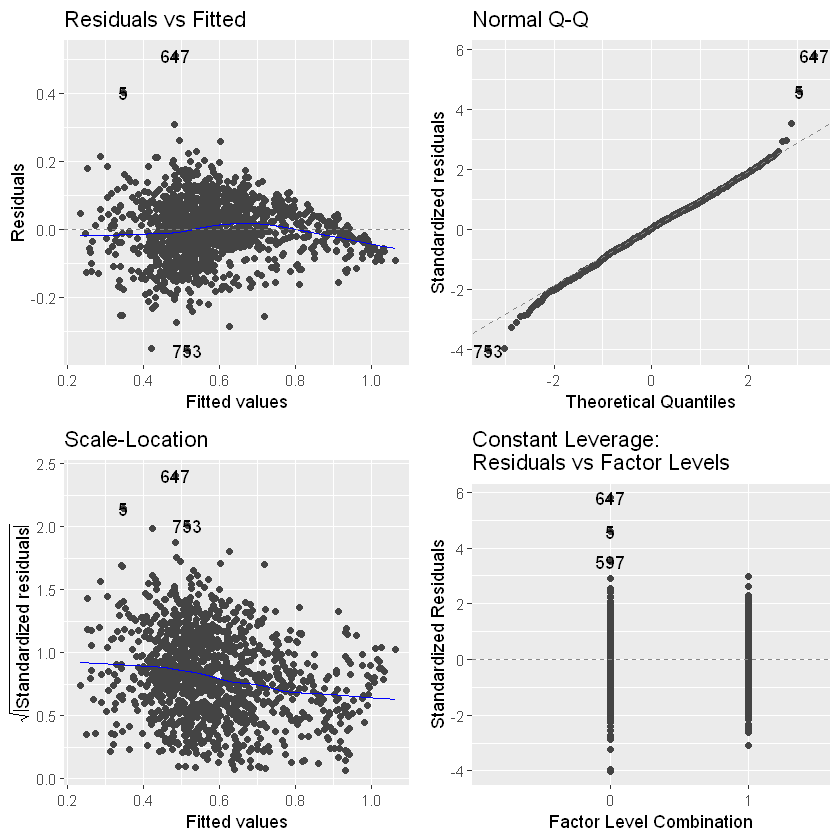

In [37]:
autoplot(publicReg)

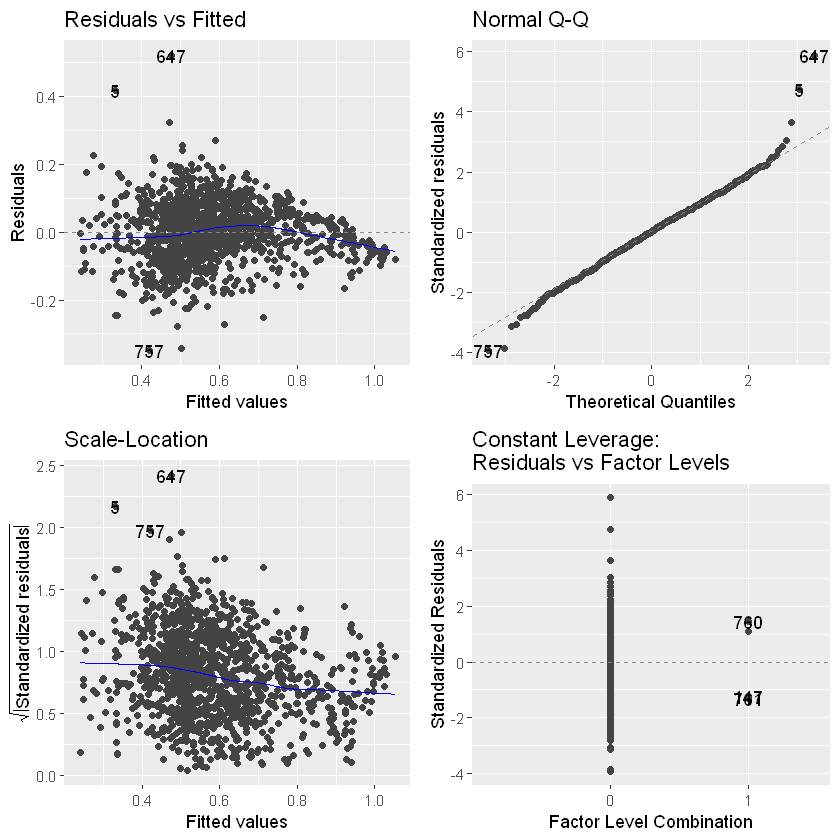

In [39]:
autoplot(ProfitReg)

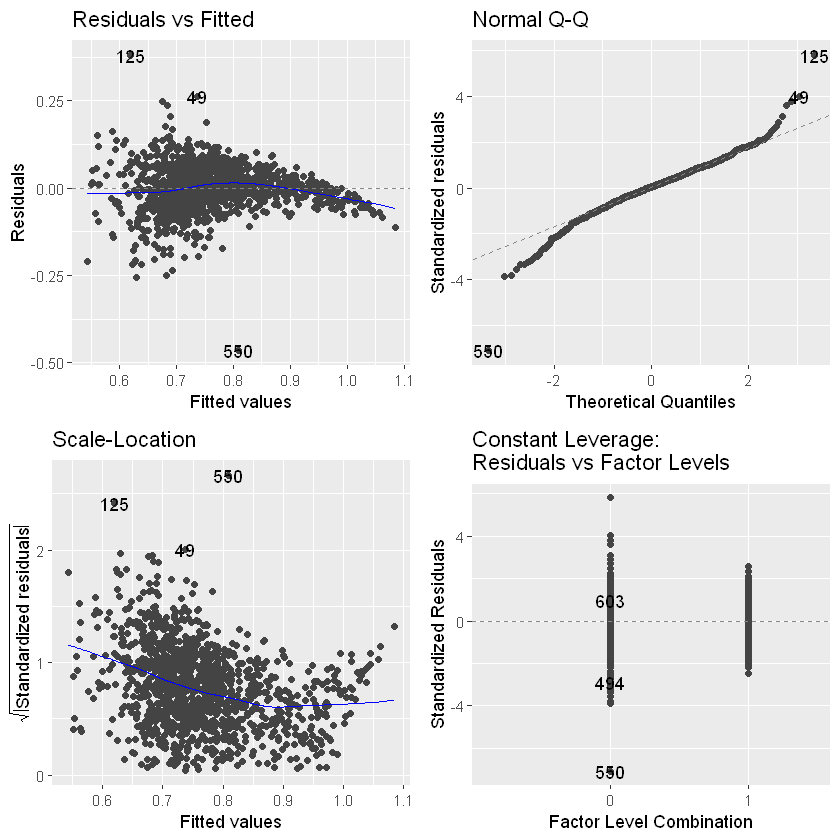

In [40]:
autoplot(PublicRet)

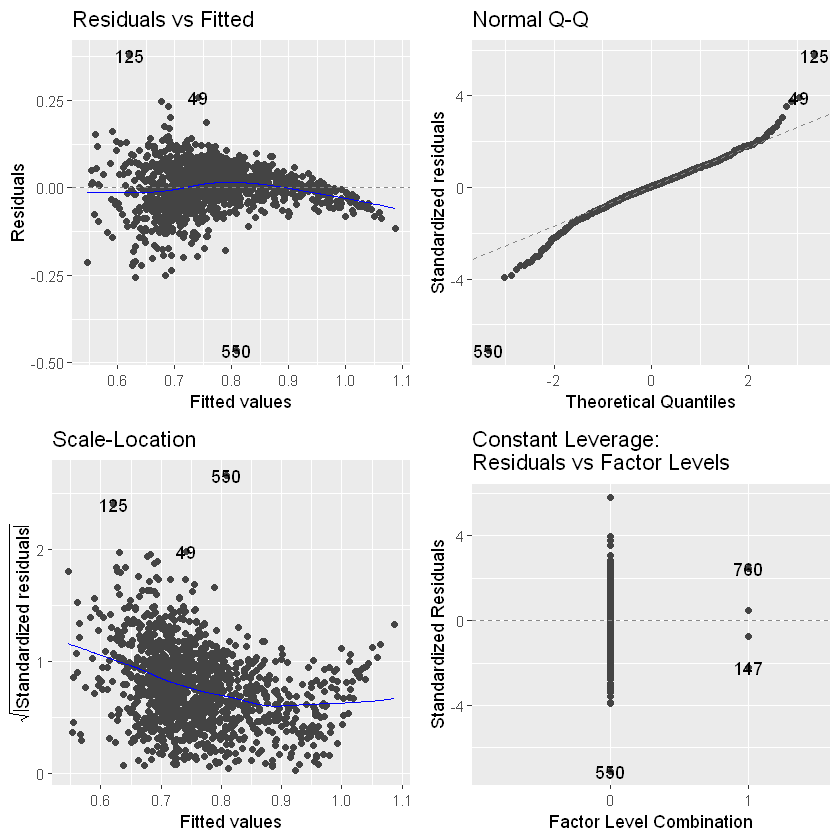

In [41]:
autoplot(ProfitRet)